In [1]:
import pandas as pd
import altair as alt

In [2]:
df=pd.read_csv('data/gfmt_sleep.csv',na_values='*') 
df['insomnia']=df['sci']<=16

In [3]:
df.head()

,participant number,gender,age,correct hit percentage,correct reject percentage,percent correct,confidence when correct hit,confidence incorrect hit,confidence correct reject,confidence incorrect reject,confidence when correct,confidence when incorrect,sci,psqi,ess,insomnia
0,8,f,39,65,80,72.5,91.0,90.0,93.0,83.5,93.0,90.0,9,13,2,True
1,16,m,42,90,90,90.0,75.5,55.5,70.5,50.0,75.0,50.0,4,11,7,True
2,18,f,31,90,95,92.5,89.5,90.0,86.0,81.0,89.0,88.0,10,9,3,True
3,22,f,35,100,75,87.5,89.5,NaN,71.0,80.0,88.0,80.0,13,8,20,True
4,27,f,74,60,65,62.5,68.5,49.0,61.0,49.0,65.0,49.0,13,9,12,True


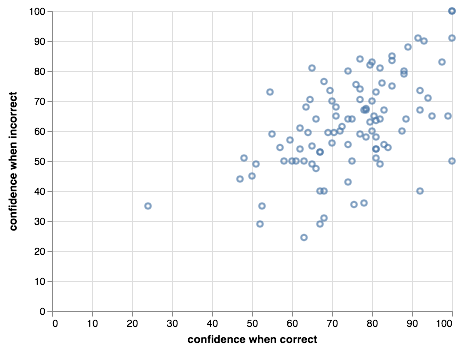

In [4]:
# from df to chart
alt.Chart(df
    ).mark_point(      # what is each point look like: shape
    ).encode(          # what decide (encode) the propertied of the point
        x='confidence when correct',
        y='confidence when incorrect')         # axis

In [5]:
# open in vega editor

In [6]:
# data type
# nominal: discete and un-ordered
# ordinal:discete and ordered
# quantitative: number
# temporal: time

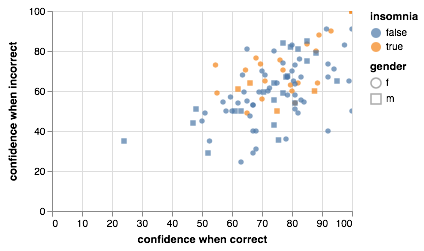

In [14]:
# add data type, adjust, color, interactive
my_chart=alt.Chart(df,
          height=200,
          width=300
    ).mark_point(     # area, circle, tick...
            filled=True
    ).encode(           # what decide (encode) the propertied of the point
        x='confidence when correct:Q',
        y='confidence when incorrect:Q',
        color='insomnia:N',
        shape='gender:N',    # circle: cannot change shape
        tooltip=['gender','insomnia','percent correct']     # interactive tag
    ).interactive()    # ususallt don't
my_chart

In [15]:
my_chart.save('test.html')

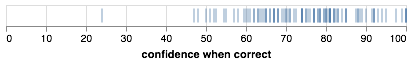

In [8]:
alt.Chart(df,
    ).mark_tick(      # area
    ).encode(          # what decide (encode) the propertied of the point
        x='confidence when correct:Q') 

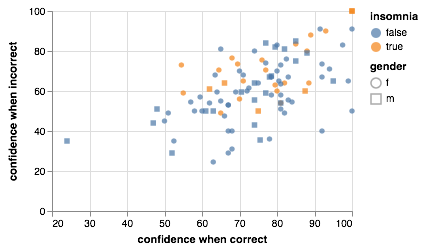

In [17]:
# add data type, adjust, color, interactive
my_chart=alt.Chart(df,
          height=200,
          width=300
    ).mark_point(     # area, circle, tick...
            filled=True
    ).encode(           # what decide (encode) the propertied of the point
        x=alt.X('confidence when correct:Q',
                type='quantitative',
                scale=alt.Scale(zero=False)),   # not start from 0
        y='confidence when incorrect:Q',
        color='insomnia:N',
        shape='gender:N')
my_chart

In [21]:
df = pd.read_csv('data/frog_tongue_adhesion.csv', comment='#')

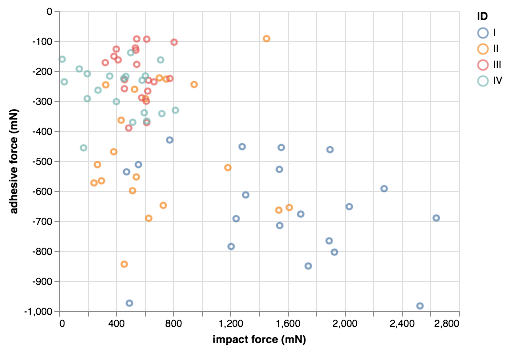

In [35]:
chart_frog=alt.Chart(df
    ).mark_point(
    ).encode(
        x='impact force (mN):Q',
        y='adhesive force (mN):Q',
        color='ID:N')
chart_frog

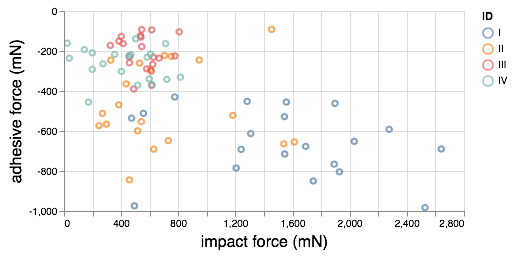

In [37]:
chart_frog.configure_view(
    height=200,width=400
    ).configure_axis(
        titleFontSize=16,
        titleFontWeight='normal'
    ).interactive()

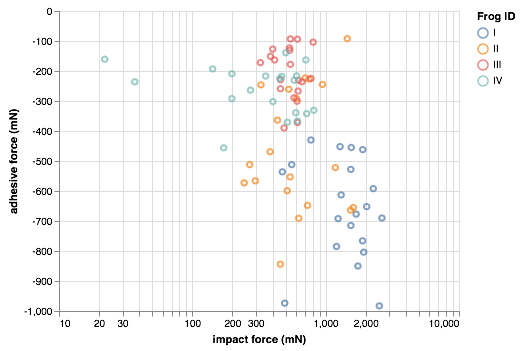

In [29]:
alt.Chart(df
    ).mark_point(
    ).encode(
        x=alt.X('impact force (mN):Q',
                scale=alt.Scale(type='log')),
        y='adhesive force (mN):Q',
        color=alt.Color('ID:N',
                       title='Frog ID'))

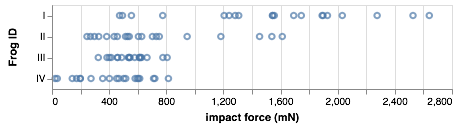

In [46]:
alt.Chart(df
    ).mark_point(
    ).encode(
        x='impact force (mN):Q',    # :Q space matteres
        y=alt.Y('ID:N',title='Frog ID')
    )

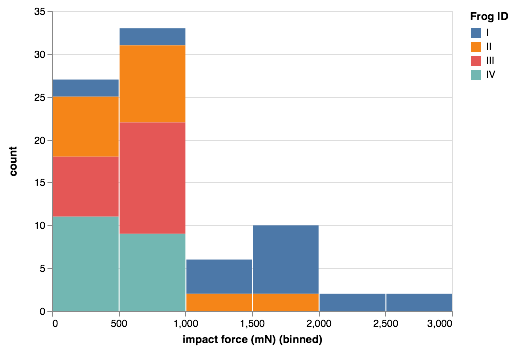

In [48]:
alt.Chart(df
    ).mark_bar(
    ).encode(
        x=alt.X('impact force (mN):Q',bin=True),
        y=alt.Y('count()',title='count'),    #automatically count
        color=alt.Color('ID',title='Frog ID')
)

In [49]:
import bootcamp_utils

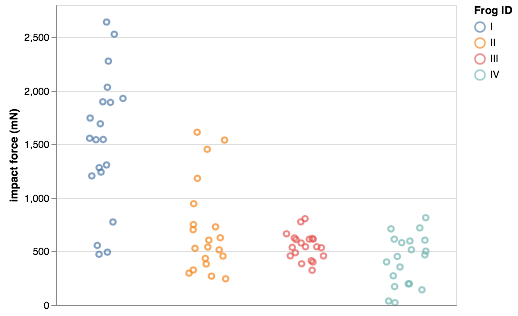

In [51]:
bootcamp_utils.altair_jitter(df,
                            encode_x=alt.X('ID:N',title='Frog ID'),
                             encode_y='impact force (mN):Q',
                             encode_tooltip=['adhesive force (mN)'])

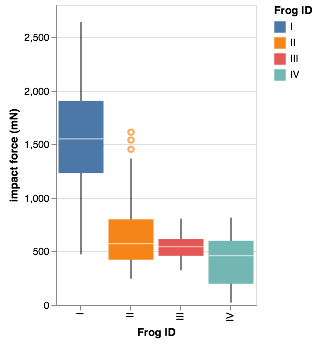

In [53]:
bootcamp_utils.altair_box(df,
                            encode_x=alt.X('ID:N',title='Frog ID'),
                            encode_y='impact force (mN):Q',
                            encode_color=alt.Color('ID:N',title='Frog ID'))

In [ ]:
# aggregate in pandas, and plot box=plot

In [59]:
df_summary = (df.groupby('ID')['impact force (mN)']
               .agg(['mean','sem'])
               .reset_index())
df_summary

,ID,mean,sem
0,I,1530.20,140.918782
1,II,707.35,94.937466
2,III,550.10,27.788477
3,IV,419.10,52.517260


In [61]:
df_summary['error low']=df_summary['mean']-1.96*df_summary['sem']
df_summary['error high']=df_summary['mean']+1.96*df_summary['sem']

df_summary

,ID,mean,sem,error low,error high
0,I,1530.20,140.918782,1253.999187,1806.400813
1,II,707.35,94.937466,521.272566,893.427434
2,III,550.10,27.788477,495.634584,604.565416
3,IV,419.10,52.517260,316.166170,522.033830


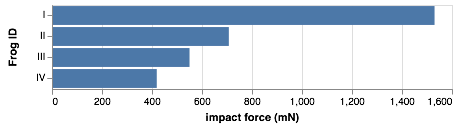

In [65]:
bars=alt.Chart(df_summary
    ).mark_bar(
    ).encode(
        x=alt.X('mean:Q',title='impact force (mN)'),
        y=alt.Y('ID:N',title='Frog ID')
        )
bars

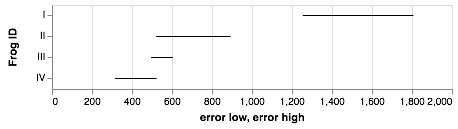

In [68]:
error_bars=alt.Chart(df_summary
    ).mark_rule(     # rule:connect 2 point to a line
    ).encode(
        x='error low:Q',
        x2='error high:Q',
        y=alt.Y('ID:N',title='Frog ID')
        )
error_bars

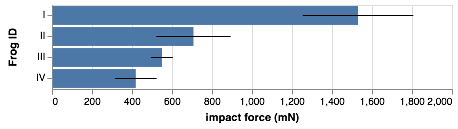

In [69]:
# bars | error_bars
# bars % error_bars
bars+error_bars